<a href="https://colab.research.google.com/github/Lavanya363/Genre-classification/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#importing the dataset
df = pd.read_csv(r'https://github.com/yogeshnile/Movies-Genre-Classification/raw/master/kaggle_movie_train.csv')

In [3]:
#exploratory data analysis - EDA
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [4]:
df.isnull().sum()

id       0
text     0
genre    0
dtype: int64

In [5]:
df.shape

(22579, 3)

In [6]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000')])

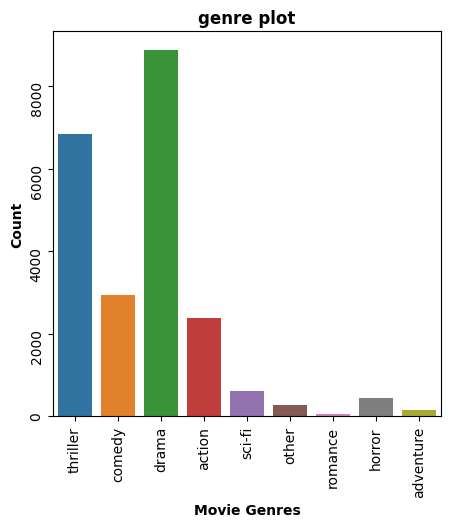

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='genre',data=df)
plt.xlabel('Movie Genres',weight='bold')
plt.ylabel('Count',weight='bold')
plt.title('genre plot',weight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=90)

In [8]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()

In [9]:
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [10]:
genre_mapper = {'other':0,'action':1,'adventure':2,'comedy':3,'drama':4,'horror':5,'romance':6,'sci-fi':7,'thriller':8}
df['genre']=df['genre'].map(genre_mapper)

In [11]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [12]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [13]:
df.drop('id',axis=1,inplace=True)

In [14]:
corpus = []
ps = PorterStemmer()

for i in range(0,df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['text'][i])
    dialog = dialog.lower()
    words = dialog.split()
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in dialog_words]
    dialog = ' '.join(words)
    corpus.append(dialog)

In [15]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
len(corpus)

22579

In [17]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

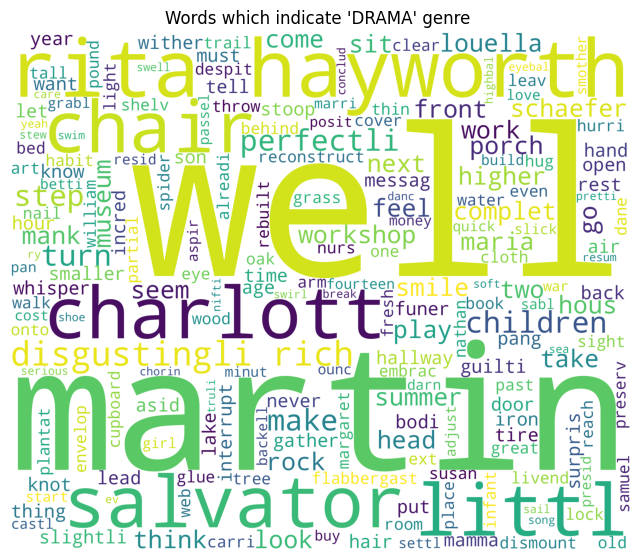

In [18]:
#wordcloud for movie genre
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

In [19]:
#creating a bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [20]:
y = df['genre'].values

In [21]:
#model building
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [22]:
#creating the model
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [23]:
MultinomialNB()

MultinomialNB()

In [24]:
nb_y_pred = nb_classifier.predict(X_test)

In [25]:
#accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [26]:
#prediction
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [27]:
#loading the test dataset
test = pd.read_csv(r'https://github.com/yogeshnile/Movies-Genre-Classification/raw/master/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [28]:
test.shape

(5589, 2)

In [29]:
test.drop('id', axis=1, inplace=True)

In [30]:
#predict the values
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: s on his horn. REILLY C'mon, move it. His police radio crackles. DISPATCHER VOICE All units, 211 reported at 8th and Sycamore. Suspect is a Caucasian male, armed with an automatic weapon, last seen heading east with female hostage in a U Haul truck ... Reilly perks up, checks his map. Jamming the wheel, he crashes out of traffic, ripping the bumper off the car in front of him, and rockets away. He grabs his mic, thinks, disguises his voice. REILLY Dispatch, this is Reilly. DISPATCHER VOICE Go ahead. REILLY Patch me through to the Bomb Squad. DISPATCHER VOICE Aren't you on suspension? REILLY Just do it. DISPATCHER VOICE Hang on. Reilly runs a red. T.J.'S VOICE T.J. here. REILLY T.J., it's Reilly, put Glass on! EXT. INT. STREET BOMB SQUAD VAN MOVING DAY T.J. is in the passenger seat, Bev sits in the back with Schnoz, Glass drives. Glass takes the mic. GLASS What's up? INTERCUT WITH REILLY REILLY Where you guys at? GLASS Driving in circles, waiting for REILLY Catch that alert? Tha